# SMA model

In [5]:
%matplotlib inline

import pylab
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from simcoon import simmit as sim
import os
from IPython.display import HTML
dir = os.path.dirname(os.path.realpath('__file__'))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

The SMA (transformation-only) constitutive law implemented in SMART+ is a rate independent description of phase transformation where the two transformations, i.e. austenite $\rightarrow$ martensite, and martensite $\rightarrow$ are considered as independant mechanisms.

27 parameters are required for the thermomechanical version: 
1. props[0] : density
2. props[1] : specific heat capacity
3. props[2] : flagT: 0 transformation temperatures linearly extrapolated; 1 : smooth temperatures
4. props[3] : EA: Young's modulus of Austenite
5. props[4] : EM: Young's modulus of Martensite
6. props[5] : nuA : Poisson's ratio of Austenite
7. props[6] : nuM : Poisson's ratio of Martensite
8. props[7] : alphaA_iso : CTE of Austenite
9. props[8] : alphaM_iso : CTE of Martensite
10. props[9] : Hmin : Minimal transformation strain magnitude
11. props[10] : Hmax : Maximal transformation strain magnitude
12. props[11] : k1 : Exponential evolution of transformation strain magnitude
13. props[12] : sigmacrit : Critical stress for change of transformation strain magnitude
14. props[13]: C_A : Slope of martesnite -> austenite parameter
15. props[14]: C_M : Slope of austenite -> martensite parameter
16. props[15]: Ms0 : Martensite start at zero stress
17. props[16]: Mf0 : Martensite finish at zero stress
18. props[17]: As0 : Austenite start at zero stress
19. props[18]: Af0 : Austenite finish at zero stress
20. props[19]: n1 : Martensite start smooth exponent
21. props[20]: n2 : Martensite finish smooth exponent
22. props[21]: n3 : Austenite start smooth exponent
23. props[22]: n4 : Austenite finish smooth exponent

24. props[23]: c_lambda : penalty function exponent start point
25. props[24]: p0_lambda : penalty function exponent limit penalty value
26. props[25]: n_lambda : penalty function power law exponent
27. props[26]: alpha_lambda : penalty function power law parameter

In SMART+ the SMA material constitutive law is implemented using a *return mapping algorithm*, with use of the *convex cutting plane* algorithm (Simo and Hughes, 1998). The updated stress is provided for 1D, plane stress, and generalized plane strain/3D analysis according to the forms of elastic isotropic materials.
The updated work, and internal heat production $r$ are determined with the algorithm presented in the *simmit* documentation.

As a start we should input the name of the UMAT as well as the list of parameters

In [6]:
umat_name = 'SMAUT' #This is the 5 character code for the elastic-plastic subroutine
nstatev = 50 #The number of scalar variables required, only the initial temperature is stored here

flagT = 0
E_A = 67538
E_M = 67538
nu_A = 0.349
nu_M = 0.349
alphaA = 1.E-6
alphaM = 1.E-6
Hmin = 0.
Hmax = 0.0418
k1 = 0.021
sigmacrit = 0.0
C_A = 10
C_M = 10
Ms0 = 250
Mf0 = 230
As0 = 260
Af0 = 280
n1 = 0.2
n2 = 0.2
n3 = 0.2
n4 = 0.2
sigmacaliber = 300
b_prager = 1.4
n_prager = 2.
c_lambda = 1.E-6
p0_lambda = 1.E-3
n_lambda = 1.0
alpha_lambda = 1.E8

##local orientation
psi_rve = 0.
theta_rve = 0.
phi_rve = 0.
solver_type = 0
corate_type = 3

#Define the properties
#Define the properties
props = np.array([flagT, E_A, E_M, nu_A, nu_M, alphaA, alphaM, Hmin, Hmax, k1, \
    sigmacrit, C_A, C_M, Ms0, Mf0, As0, Af0, n1, n2, n3, n4, sigmacaliber, b_prager, n_prager, \
    c_lambda, p0_lambda, n_lambda, alpha_lambda])
path_data = 'data'
path_results = 'results'

#Run the simulation
pathfile = 'path.txt'
outputfile = 'results_SMA.txt'
sim.solver(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, solver_type, corate_type, path_data, path_results, pathfile, outputfile)

TypeError: solver(): incompatible function arguments. The following argument types are supported:
    1. (arg0: str, arg1: numpy.ndarray[numpy.float64], arg2: int, arg3: float, arg4: float, arg5: float, arg6: int, arg7: int, arg8: str, arg9: str, arg10: str, arg11: str) -> None

Invoked with: 'SMAUT', array([0.0000e+00, 6.7538e+04, 6.7538e+04, 3.4900e-01, 3.4900e-01,
       1.0000e-06, 1.0000e-06, 0.0000e+00, 4.1800e-02, 2.1000e-02,
       0.0000e+00, 1.0000e+01, 1.0000e+01, 2.5000e+02, 2.3000e+02,
       2.6000e+02, 2.8000e+02, 2.0000e-01, 2.0000e-01, 2.0000e-01,
       2.0000e-01, 3.0000e+02, 1.4000e+00, 2.0000e+00, 1.0000e-06,
       1.0000e-03, 1.0000e+00, 1.0000e+08]), 50, 0.0, 0.0, 0.0, 0, 'data', 'results', 'path.txt', 'results_SMA.txt'

In [3]:
#prepare the load
fig = plt.figure()
outputfile_global = 'results_SMA_global-0.txt'
pylab.rcParams['figure.figsize'] = (24.0, 12.0) #configure the figure output size
path = dir + '/results/'
P_global = path + outputfile_global

#Get the data
e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(P_global, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
time, T, Q, r = np.loadtxt(P_global, usecols=(4,5,6,7), unpack=True)
Wm, Wm_r, Wm_ir, Wm_d = np.loadtxt(P_global, usecols=(20,21,22,23), unpack=True)

#Plot the results
ax = fig.add_subplot(1, 2, 1)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel(r'Strain $\varepsilon_{11}$', size = 15)
plt.ylabel(r'Stress $\sigma_{11}$\,(MPa)', size = 15)
plt.plot(e11,s11, c='black', label='direction 1')
plt.legend(loc=2)

ax = fig.add_subplot(1, 2, 2)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('time (s)', size = 15)
plt.ylabel(r'$W_m$',size = 15)
plt.plot(time,Wm, c='black', label=r'$W_m$')
plt.plot(time,Wm_r, c='green', label=r'$W_m^r$')
plt.plot(time,Wm_ir, c='blue', label=r'$W_m^{ir}$')
plt.plot(time,Wm_d, c='red', label=r'$W_m^d$')
plt.legend(loc=2)

plt.savefig('example.pdf', format='pdf')
plt.show()

FileNotFoundError: /Users/ychemisky/scratch/simcoon/Notebooks/Umats/Mechanical/SMA_TR/results/results_SMA_global-0.txt not found.

<Figure size 640x480 with 0 Axes>

## Test now the increments 

In [30]:
#Run the simulations - 1 increment
pathfile = 'path_1.txt'
outputfile = 'results_SMA_1.txt'
sim.solver(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, solver_type, path_data, path_results, pathfile, outputfile)
outputfile_global_1 = 'results_SMA_1_global-0.txt'

#Run the simulations - 10 increments
pathfile = 'path_20.txt'
outputfile = 'results_SMA_20.txt'
sim.solver(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, solver_type, path_data, path_results, pathfile, outputfile)
outputfile_global_20 = 'results_SMA_20_global-0.txt'

#Run the simulations - 100 increments
pathfile = 'path_100.txt'
outputfile = 'results_SMA_100.txt'
sim.solver(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, solver_type, path_data, path_results, pathfile, outputfile)
outputfile_global_100 = 'results_SMA_100_global-0.txt'

#Run the simulations - 1000 increments
pathfile = 'path_1000.txt'
outputfile = 'results_SMA_1000.txt'
sim.solver(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, solver_type, path_data, path_results, pathfile, outputfile)
outputfile_global_1000 = 'results_SMA_1000_global-0.txt'

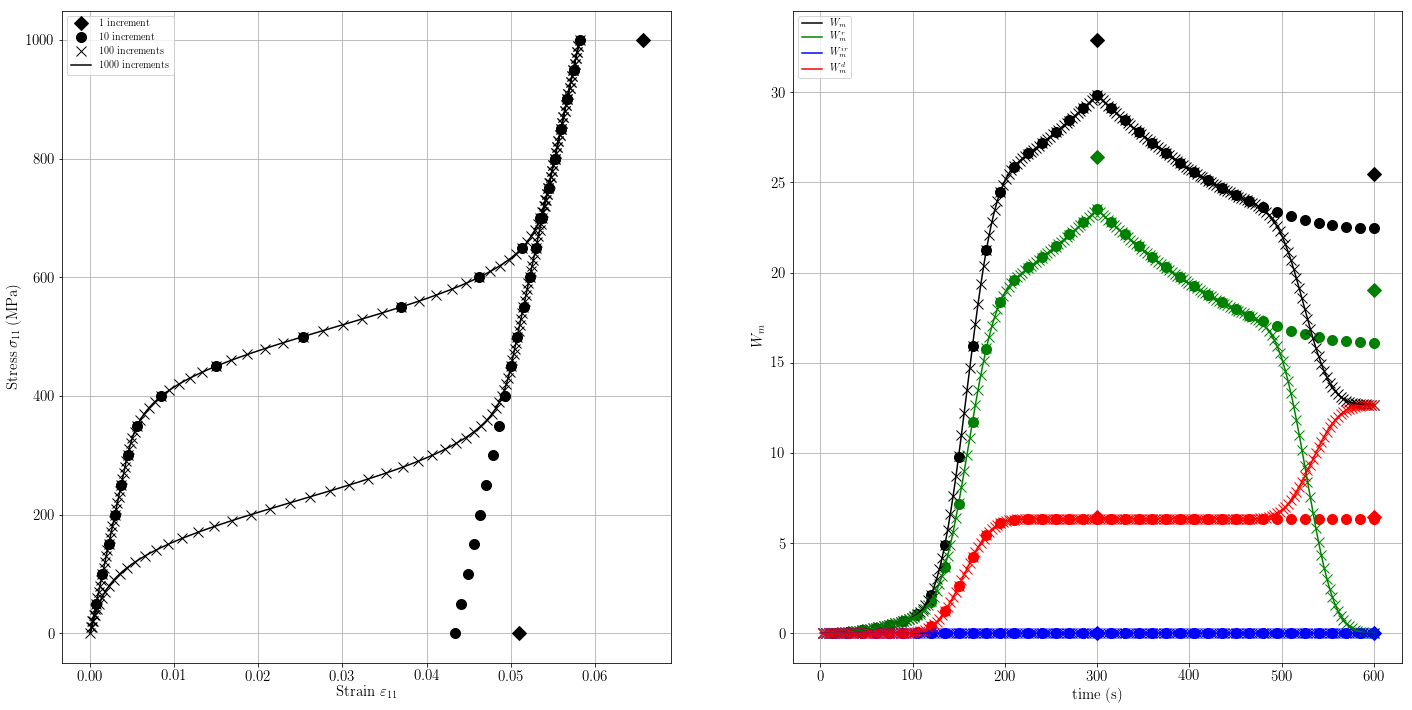

In [31]:
pylab.rcParams['figure.figsize'] = (24.0, 12.0) #configure the figure output size
path = dir + '/results/'
P_global_1 = path + outputfile_global_1
P_global_20 = path + outputfile_global_20
P_global_100 = path + outputfile_global_100
P_global_1000 = path + outputfile_global_1000

#Get the data
e11_1, e22_1, e33_1, e12_1, e13_1, e23_1, s11_1, s22_1, s33_1, s12_1, s13_1, s23_1 = np.loadtxt(P_global_1, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
time_1, T_1, Q_1, r_1 = np.loadtxt(P_global_1, usecols=(4,5,6,7), unpack=True)
Wm_1, Wm_r_1, Wm_ir_1, Wm_d_1 = np.loadtxt(P_global_1, usecols=(20,21,22,23), unpack=True)

e11_10, e22_10, e33_10, e12_10, e13_10, e23_10, s11_10, s22_10, s33_10, s12_10, s13_10, s23_10 = np.loadtxt(P_global_10, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
time_10, T_10, Q_10, r_10 = np.loadtxt(P_global_20, usecols=(4,5,6,7), unpack=True)
Wm_10, Wm_r_10, Wm_ir_10, Wm_d_10 = np.loadtxt(P_global_20, usecols=(20,21,22,23), unpack=True)

e11_100, e22_100, e33_100, e12_100, e13_100, e23_100, s11_100, s22_100, s33_100, s12_100, s13_100, s23_100 = np.loadtxt(P_global_100, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
time_100, T_100, Q_100, r_100 = np.loadtxt(P_global_100, usecols=(4,5,6,7), unpack=True)
Wm_100, Wm_r_100, Wm_ir_100, Wm_d_100 = np.loadtxt(P_global_100, usecols=(20,21,22,23), unpack=True)

e11_1000, e22_1000, e33_1000, e12_1000, e13_1000, e23_1000, s11_1000, s22_1000, s33_1000, s12_1000, s13_1000, s23_1000 = np.loadtxt(P_global_1000, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
time_1000, T_1000, Q_1000, r_1000 = np.loadtxt(P_global_1000, usecols=(4,5,6,7), unpack=True)
Wm_1000, Wm_r_1000, Wm_ir_1000, Wm_d_1000 = np.loadtxt(P_global_1000, usecols=(20,21,22,23), unpack=True)

fig = plt.figure()
pylab.rcParams['figure.figsize'] = (24.0, 12.0) #configure the figure output size

#Plot the results
ax = fig.add_subplot(1, 2, 1)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel(r'Strain $\varepsilon_{11}$', size = 15)
plt.ylabel(r'Stress $\sigma_{11}$\,(MPa)', size = 15)
plt.plot(e11_1,s11_1, linestyle='None', marker='D', color='black', markersize=10, label='1 increment')
plt.plot(e11_10,s11_10, linestyle='None', marker='o', color='black', markersize=10, label='10 increment')
plt.plot(e11_100,s11_100, linestyle='None', marker='x', color='black', markersize=10, label='100 increments')
plt.plot(e11_1000,s11_1000, c='black', label='1000 increments')
plt.legend(loc=2)

ax = fig.add_subplot(1, 2, 2)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('time (s)', size = 15)
plt.ylabel(r'$W_m$',size = 15)
#1 increment
plt.plot(time_1,Wm_1, linestyle='None', marker='D', color='black', markersize=10)#, label=r'$W_m$')
plt.plot(time_1,Wm_r_1, linestyle='None', marker='D', color='green', markersize=10)#, label=r'$W_m^r$')
plt.plot(time_1,Wm_ir_1, linestyle='None', marker='D', color='blue', markersize=10)#, label=r'$W_m^{ir}$')
plt.plot(time_1,Wm_d_1, linestyle='None', marker='D', color='red', markersize=10)#, label=r'$W_m^d$')
#10 increment
plt.plot(time_10,Wm_10, linestyle='None', marker='o', color='black', markersize=10)#, label=r'$W_m$')
plt.plot(time_10,Wm_r_10, linestyle='None', marker='o', color='green', markersize=10)#, label=r'$W_m^r$')
plt.plot(time_10,Wm_ir_10, linestyle='None', marker='o', color='blue', markersize=10)#, label=r'$W_m^{ir}$')
plt.plot(time_10,Wm_d_10, linestyle='None', marker='o', color='red', markersize=10)#, label=r'$W_m^d$')
#100 increments
plt.plot(time_100,Wm_100, linestyle='None', marker='x', color='black', markersize=10)#, label=r'$W_m$')
plt.plot(time_100,Wm_r_100, linestyle='None', marker='x', color='green', markersize=10)#, label=r'$W_m^r$')
plt.plot(time_100,Wm_ir_100, linestyle='None', marker='x', color='blue', markersize=10)#, label=r'$W_m^{ir}$')
plt.plot(time_100,Wm_d_100, linestyle='None', marker='x', color='red', markersize=10)#, label=r'$W_m^d$')
#1000 increments
plt.plot(time_1000,Wm_1000, c='black', label=r'$W_m$')
plt.plot(time_1000,Wm_r_1000, c='green', label=r'$W_m^r$')
plt.plot(time_1000,Wm_ir_1000, c='blue', label=r'$W_m^{ir}$')
plt.plot(time_1000,Wm_d_1000, c='red', label=r'$W_m^d$')
##
plt.legend(loc=2)

plt.savefig('example2.pdf', format='pdf')
plt.show()
